# Завдання

Використовуючи наведений у лекції датасет і код, створіть на основі двошарової нейромережі тришарову. Оцініть її похибку та точність визначення класів. Після цього використайте для оцінки похибки **Mean Squared Error**, в якості оптимізатора – **Adam**. Порівняйте, чи змінилась похибка та точність.

# Розв'язок

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchviz

In [3]:
nX, nH1, nH2, nH3, nY = 2, 5, 5, 3, 1
model = nn.Sequential(
    nn.Linear(nX, nH1),
    nn.Sigmoid(),
    nn.Linear(nH1, nH2),
    nn.Sigmoid(),   
    nn.Linear(nH2, nY),
    nn.Sigmoid())

In [4]:
class ThreeLayersNet(nn.Module):
    def __init__(self, nX, nH1, nH2, nY):        
        super(ThreeLayersNet, self).__init__()
         
        self.fc1 = nn.Linear(nX, nH1)
        self.fc2 = nn.Linear(nH1, nH2) 
        self.fc3 = nn.Linear(nH2, nY)
          
    def forward(self, x):
        x = self.fc1(x)
        x = nn.Sigmoid()(x)
        x = self.fc2(x)
        x = nn.Sigmoid()(x) 
        x = self.fc3(x)
        x = nn.Sigmoid()(x)
        return x

In [5]:
X = torch.rand (1200, 2)                       
Y = (torch.sum((X - 0.5)**2, axis=1) < 0.1).float().view(-1,1)

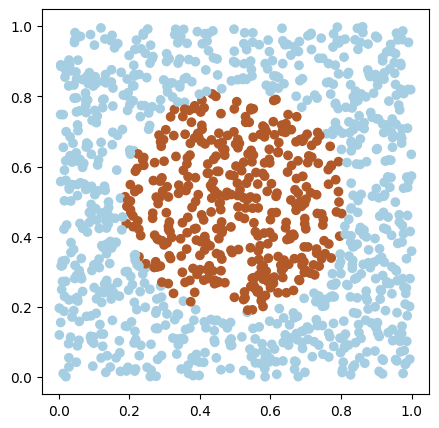

In [6]:
plt.figure (figsize=(5, 5))
plt.scatter(X.numpy()[:,0], X.numpy()[:,1], c=Y.numpy()[:,0],cmap=plt.cm.Paired)        
plt.show() 

In [7]:
model = ThreeLayersNet(2, 5, 5, 1)

loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5, momentum=0.8)

In [8]:
def fit(model, X,Y, batch_size=100, train=True):    
      model.train(train)                                 
      sumL, sumA, numB = 0, 0, int( len(X)/batch_size ) 
       
      for i in range(0, numB*batch_size, batch_size):          
        xb = X[i: i+batch_size]
        yb = Y[i: i+batch_size]
                      
        y = model(xb)
        L = loss(y, yb)
  
        if train:
            optimizer.zero_grad()      
            L.backward()            
            optimizer.step()
                                     
        sumL += L.item()
        sumA += (y.round() == yb).float().mean()
         
        return sumL/numB, sumA/numB

In [10]:
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model, X,Y) )
 
epochs = 1000
for epoch in range(epochs):
    L,A = fit(model, X, Y)
     
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.0596 accuracy: 0.0283
epoch:     0 loss: 0.0565 accuracy: 0.0550
epoch:   100 loss: 0.0534 accuracy: 0.0550
epoch:   200 loss: 0.0534 accuracy: 0.0550
epoch:   300 loss: 0.0534 accuracy: 0.0550
epoch:   400 loss: 0.0534 accuracy: 0.0550
epoch:   500 loss: 0.0534 accuracy: 0.0550
epoch:   600 loss: 0.0534 accuracy: 0.0550
epoch:   700 loss: 0.0534 accuracy: 0.0550
epoch:   800 loss: 0.0534 accuracy: 0.0550
epoch:   900 loss: 0.0534 accuracy: 0.0550
epoch:   999 loss: 0.0534 accuracy: 0.0550


In [11]:
print(model)

ThreeLayersNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=1, bias=True)
)


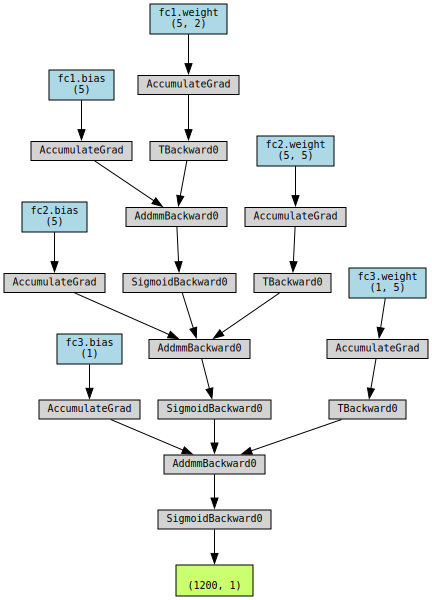

In [12]:
torchviz.make_dot(model(X), params = dict(model.named_parameters()))

In [13]:
X1 = torch.rand (600, 2)                       
Y1 = (torch.sum((X - 0.5)**2, axis=1) < 0.1).float().view(-1,1)

In [14]:
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model, X1,Y1) )
 
epochs = 1000
for epoch in range(epochs):
    L,A = fit(model, X1, Y1)
     
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.1068 accuracy: 0.1100
epoch:     0 loss: 0.1068 accuracy: 0.1100
epoch:   100 loss: 0.1067 accuracy: 0.1100
epoch:   200 loss: 0.1062 accuracy: 0.1100
epoch:   300 loss: 0.1048 accuracy: 0.1100
epoch:   400 loss: 0.1040 accuracy: 0.1100
epoch:   500 loss: 0.1038 accuracy: 0.1100
epoch:   600 loss: 0.1037 accuracy: 0.1100
epoch:   700 loss: 0.1036 accuracy: 0.1100
epoch:   800 loss: 0.1036 accuracy: 0.1100
epoch:   900 loss: 0.1036 accuracy: 0.1100
epoch:   999 loss: 0.1035 accuracy: 0.1100


### Оцінка похибки за допомогою Mean Squared Error та оптимізатора Adam

In [19]:
model = ThreeLayersNet(2, 5, 5, 1)

loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False, foreach=None, maximize=False, capturable=False, differentiable=False, fused=None)
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model, X,Y) )
epochs = 1000
for epoch in range(epochs):
    L,A = fit(model, X, Y)
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.0192 accuracy: 0.0550
epoch:     0 loss: 0.0192 accuracy: 0.0550
epoch:   100 loss: 0.0187 accuracy: 0.0550
epoch:   200 loss: 0.0187 accuracy: 0.0550
epoch:   300 loss: 0.0187 accuracy: 0.0550
epoch:   400 loss: 0.0187 accuracy: 0.0550
epoch:   500 loss: 0.0187 accuracy: 0.0550
epoch:   600 loss: 0.0187 accuracy: 0.0550
epoch:   700 loss: 0.0187 accuracy: 0.0550
epoch:   800 loss: 0.0187 accuracy: 0.0550
epoch:   900 loss: 0.0187 accuracy: 0.0550
epoch:   999 loss: 0.0187 accuracy: 0.0550


**Таким чином, застосування функції nn.MSELoss() та оптимізатора Adam покращило показники похибки та точності моделі у порівнянні із аналогічним застосуванням функції nn.BCELoss() та оптимізатора SGD**